## Importing all the necessary libraries to get started with the Data Wrangling and Analysis Part

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cepheus-23-data-science-hackathon-ps-i/train_data.csv
/kaggle/input/cepheus-23-data-science-hackathon-ps-i/test_data.csv
/kaggle/input/cepheus-23-data-science-hackathon-ps-i/Sample Submission.csv


In [ ]:
train_path = '/kaggle/input/cepheus-23-data-science-hackathon-ps-i/train_data.csv'
test_path = '/kaggle/input/cepheus-23-data-science-hackathon-ps-i/test_data.csv'
sub_path = '/kaggle/input/cepheus-23-data-science-hackathon-ps-i/Sample Submission.csv'

In [ ]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_sub = pd.read_csv(sub_path)

In [ ]:
### Dropping ID columns from both train and test set as they have no value for modelling

df_train = df_train.drop(['Unnamed: 0','Sample ID','Sample Name'],axis=1)
df_test = df_test.drop(['Unnamed: 0','Sample ID','Sample Name'],axis=1)

In [ ]:
df_train.sample(10)

,Perimeter,Filled Area,Convex Area,Equivalent Radius,Extent,Points of Extremum,Compactness,Diameter,Direction,Length of Major Axis,...,Bordered Area 2,Bordered Area 3,Bordered Area 4,Centroid 1,Centroid 2,Convex Hull 1,Convex Hull 2,Convex Hull 3,Convex Hull 4,Bacteria
44020,0.256000,0.30400,0.066400,1.940000,10.300000,12.800000,16.200000,6.720000,13.300000,1.000000,...,4.910000,1.630000,1.300000,12.900000,5.320000,12.700000,12.700000,12.500000,12.400000,Charmayanne
79935,11.139647,6.96138,1.081646,9.140048,1.100924,20.240026,20.415108,40.588904,3.339251,17.816588,...,4.725137,17.182741,3.746714,10.163703,18.115573,11.220332,20.547405,2.777977,5.969476,Cruor
13882,0.739000,0.18800,0.275000,1.640000,0.795000,7.680000,2.710000,13.300000,6.320000,3.370000,...,9.710000,4.070000,4.450000,8.870000,11.100000,6.700000,6.700000,6.760000,6.770000,Charmayanne
46541,0.290000,0.26300,0.057700,1.755000,9.970000,20.000000,15.300000,9.780000,7.680000,0.693000,...,10.000000,1.190000,1.500000,20.000000,10.600000,19.500000,19.500000,19.600000,19.600000,Gelledius
30868,0.458000,0.07880,0.059700,1.035000,1.670000,19.400000,5.190000,14.300000,5.090000,1.460000,...,16.200000,1.600000,2.300000,19.800000,17.200000,19.000000,19.000000,19.200000,20.000000,Gelledius
6249,0.560000,0.26800,0.079000,1.860000,8.410000,20.300000,12.500000,3.080000,4.010000,0.753000,...,9.690000,1.290000,1.840000,20.100000,10.500000,19.300000,19.300000,19.600000,19.600000,Elixoria
25507,1.040000,0.29400,0.130000,2.020000,3.780000,16.400000,8.880000,18.360000,4.060000,1.730000,...,17.700000,1.960000,3.170000,17.300000,19.000000,16.300000,16.300000,16.400000,16.400000,Charmayanne
5181,1.920000,1.54000,0.611000,4.015000,4.720000,18.800000,7.350000,15.560000,0.385000,2.620000,...,5.710000,2.950000,6.600000,19.800000,8.990000,18.800000,18.800000,18.900000,18.900000,Myaree
25667,0.505000,0.42300,0.116000,2.060000,5.120000,14.200000,10.400000,15.900000,8.550000,1.450000,...,11.600000,2.450000,1.960000,15.200000,12.400000,14.200000,14.200000,14.400000,14.400000,Charmayanne
18383,1.690000,0.34000,0.312000,2.190000,2.500000,2.700000,4.290000,15.300000,13.200000,2.140000,...,15.300000,3.970000,2.740000,3.520000,16.500000,2.520000,2.520000,1.860000,1.840000,Myaree


In [ ]:
print(df_train.shape)

(83471, 22)


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83471 entries, 0 to 83470
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Perimeter             83471 non-null  float64
 1   Filled Area           83471 non-null  float64
 2   Convex Area           83471 non-null  float64
 3   Equivalent Radius     83471 non-null  float64
 4   Extent                83471 non-null  float64
 5   Points of Extremum    83471 non-null  float64
 6   Compactness           83471 non-null  float64
 7   Diameter              83471 non-null  float64
 8   Direction             83471 non-null  float64
 9   Length of Major Axis  83471 non-null  float64
 10  Length of Minor Axis  83471 non-null  float64
 11  Bordered Area 1       83471 non-null  float64
 12  Bordered Area 2       83471 non-null  float64
 13  Bordered Area 3       83471 non-null  float64
 14  Bordered Area 4       83471 non-null  float64
 15  Centroid 1         

In [ ]:
df_train['Bacteria'].value_counts()

Charmayanne    9375
Raizovox       9368
Flitter        9350
Cruor          9292
Myaree         9278
Onyxium        9243
Elixoria       9204
Potentiopus    9195
Gelledius      9166
Name: Bacteria, dtype: int64

In [ ]:
len(df_train['Bacteria'].value_counts())

9

In [ ]:
df_test.sample(10)

,Perimeter,Filled Area,Convex Area,Equivalent Radius,Extent,Points of Extremum,Compactness,Diameter,Direction,Length of Major Axis,...,Bordered Area 1,Bordered Area 2,Bordered Area 3,Bordered Area 4,Centroid 1,Centroid 2,Convex Hull 1,Convex Hull 2,Convex Hull 3,Convex Hull 4
9229,0.554000,0.407000,0.097500,2.145000,11.400000,5.480000,13.400000,15.180000,11.800000,1.720000,...,3.710000,16.600000,2.630000,0.882000,4.760000,17.000000,3.700000,3.700000,3.710000,3.710000
22180,5.592700,2.063554,17.359609,4.729764,14.839297,20.189350,19.267159,11.598375,18.542391,5.182395,...,6.565670,12.828201,0.181165,22.939326,22.433908,18.772562,22.004296,4.432709,18.186152,20.992276
10269,0.215000,0.043200,0.018100,0.760000,6.000000,3.380000,9.530000,2.800000,14.600000,0.524000,...,2.660000,5.690000,0.820000,0.691000,2.840000,5.920000,2.630000,2.630000,2.660000,2.660000
10822,1.030000,0.686000,0.192000,2.540000,7.490000,17.100000,9.490000,11.940000,9.360000,1.420000,...,16.500000,15.100000,2.590000,1.920000,17.700000,15.900000,16.400000,16.400000,16.600000,16.900000
103,0.366000,0.065500,0.024400,0.905000,5.060000,7.650000,9.920000,6.900000,10.700000,1.180000,...,7.560000,14.000000,2.040000,0.460000,8.390000,14.100000,7.490000,7.490000,7.570000,7.680000
22229,18.342290,2.383738,14.674937,2.603594,6.831911,18.249598,1.851312,12.724892,11.261703,0.659661,...,14.899963,14.936416,8.917280,20.386959,20.813778,19.714046,5.859162,11.566431,10.835893,11.851969
15047,0.060900,0.023500,0.005180,0.550000,12.700000,6.370000,18.000000,1.106000,20.300000,0.181000,...,6.310000,2.460000,0.316000,0.441000,6.210000,2.490000,6.300000,6.300000,6.340000,6.310000
12400,0.033300,0.002850,0.001160,0.177000,5.040000,17.400000,10.400000,1.944000,17.400000,0.157000,...,17.400000,22.700000,0.158000,0.269000,17.300000,22.700000,17.300000,17.300000,17.400000,17.400000
2387,7.140000,3.050000,1.710000,5.500000,3.340000,14.000000,4.850000,14.100000,9.540000,3.300000,...,10.000000,9.460000,6.270000,8.150000,13.100000,13.700000,9.970000,9.970000,10.000000,10.000000
21640,18.384625,13.514880,16.704273,5.279394,20.516704,11.360561,17.676920,11.816388,0.811115,0.900701,...,6.349331,7.967350,13.665228,9.247116,5.002744,3.550888,14.296275,9.452698,5.089724,19.585854


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22264 entries, 0 to 22263
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Perimeter             22264 non-null  float64
 1   Filled Area           22264 non-null  float64
 2   Convex Area           22264 non-null  float64
 3   Equivalent Radius     22264 non-null  float64
 4   Extent                22264 non-null  float64
 5   Points of Extremum    22264 non-null  float64
 6   Compactness           22264 non-null  float64
 7   Diameter              22264 non-null  float64
 8   Direction             22264 non-null  float64
 9   Length of Major Axis  22264 non-null  float64
 10  Length of Minor Axis  22264 non-null  float64
 11  Bordered Area 1       22264 non-null  float64
 12  Bordered Area 2       22264 non-null  float64
 13  Bordered Area 3       22264 non-null  float64
 14  Bordered Area 4       22264 non-null  float64
 15  Centroid 1         

In [ ]:
df_sub

,ID,Bacteria
0,0,Elixoria
1,1,Elixoria
2,2,Elixoria
3,3,Elixoria
4,4,Elixoria
...,...,...
22259,22259,Elixoria
22260,22260,Elixoria
22261,22261,Elixoria
22262,22262,Elixoria


In [ ]:
target = df_train['Bacteria'].values

In [ ]:
df_combo = pd.concat([df_train.drop('Bacteria',axis=1),df_test],ignore_index = False)
df_combo

,Perimeter,Filled Area,Convex Area,Equivalent Radius,Extent,Points of Extremum,Compactness,Diameter,Direction,Length of Major Axis,...,Bordered Area 1,Bordered Area 2,Bordered Area 3,Bordered Area 4,Centroid 1,Centroid 2,Convex Hull 1,Convex Hull 2,Convex Hull 3,Convex Hull 4
0,1.010000,0.203000,0.154000,1.685000,1.570000,19.100000,5.230000,12.060000,19.500000,2.390000,...,17.300000,1.640000,2.060000,4.930000,18.300000,3.610000,18.800000,18.800000,18.800000,18.700000
1,0.209000,0.127000,0.028600,1.245000,11.700000,10.900000,15.700000,7.400000,21.800000,0.537000,...,10.500000,15.300000,0.633000,1.210000,10.700000,15.900000,10.600000,10.600000,10.700000,10.500000
2,0.178000,0.026100,0.013700,0.585000,5.450000,2.190000,7.660000,3.400000,22.800000,0.336000,...,1.780000,18.900000,0.561000,0.671000,1.790000,19.100000,1.870000,1.870000,1.780000,1.780000
3,0.100000,0.010800,0.004160,0.371500,4.820000,8.370000,10.800000,0.632000,15.700000,0.262000,...,8.050000,10.100000,0.403000,0.441000,8.030000,10.200000,7.980000,7.980000,8.100000,8.100000
4,3.760000,1.410000,1.410000,4.420000,1.950000,10.800000,3.790000,10.780000,12.200000,10.600000,...,2.130000,13.500000,16.400000,3.400000,9.780000,14.900000,2.130000,2.130000,2.130000,2.130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22259,8.127362,15.157922,19.123231,9.070423,22.094411,5.455689,12.540516,10.529871,19.500015,20.486689,...,19.220042,16.174654,8.955012,22.382569,4.508079,8.972265,21.632945,22.181519,8.342526,14.606060
22260,7.164784,15.622171,21.345612,5.548892,20.653766,7.100063,11.365499,14.065895,22.241833,13.629324,...,5.198843,11.505571,14.005182,17.756877,3.666004,3.178938,11.753264,5.496658,11.807913,5.444199
22261,1.541756,10.593116,20.681600,0.574818,12.162366,3.039919,22.258412,8.876414,4.874545,12.551204,...,11.439650,8.893547,0.693320,14.650210,21.002654,5.473467,17.436773,0.897294,20.407052,4.747563
22262,4.449560,7.381957,3.970820,2.375079,19.212798,12.807824,16.877100,12.172326,3.683321,20.677327,...,13.687905,15.446464,14.679119,12.025901,10.546922,15.650620,16.024275,17.161560,7.336912,7.397607


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(df_train['Bacteria'])

### Obseving how much the data is Imbalanced

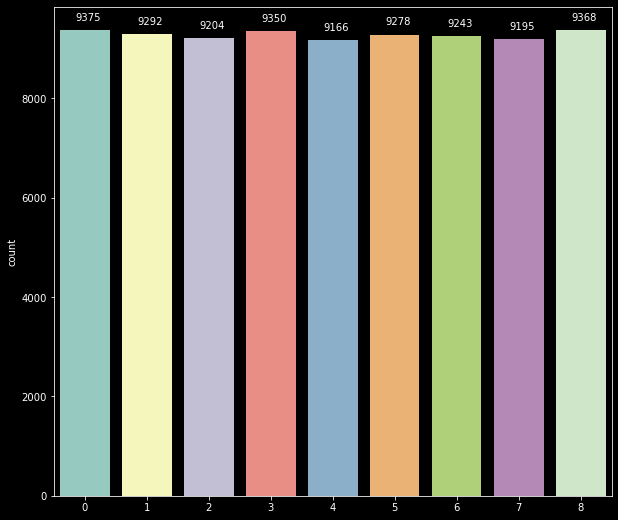

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,9))
ax = sns.countplot(target)
ax.tick_params(color='white', labelcolor='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')  
for spine in ax.spines.values():
    spine.set_edgecolor('white')
df_train['Bacteria'].value_counts()

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+200))

plt.show()
plt.savefig('temp.png', transparent=True)

In [ ]:
df_combo.isnull().sum()

Perimeter               0
Filled Area             0
Convex Area             0
Equivalent Radius       0
Extent                  0
Points of Extremum      0
Compactness             0
Diameter                0
Direction               0
Length of Major Axis    0
Length of Minor Axis    0
Bordered Area 1         0
Bordered Area 2         0
Bordered Area 3         0
Bordered Area 4         0
Centroid 1              0
Centroid 2              0
Convex Hull 1           0
Convex Hull 2           0
Convex Hull 3           0
Convex Hull 4           0
dtype: int64

### Looking At the skewness of the Data

In [ ]:
skew_df = df_combo.skew().T 
skew_df 

Perimeter               1.381329
Filled Area             1.413047
Convex Area             1.387966
Equivalent Radius       1.282912
Extent                  0.990882
Points of Extremum     -0.035992
Compactness             0.393910
Diameter                1.108763
Direction              -0.085161
Length of Major Axis    1.369458
Length of Minor Axis    1.397100
Bordered Area 1         0.028023
Bordered Area 2         0.072429
Bordered Area 3         1.318332
Bordered Area 4         1.286792
Centroid 1             -0.035076
Centroid 2             -0.023348
Convex Hull 1           0.020454
Convex Hull 2           0.023597
Convex Hull 3           0.026531
Convex Hull 4           0.020576
dtype: float64

### Checking All the KDE Plots

  0%|          | 0/21 [00:00<?, ?it/s]

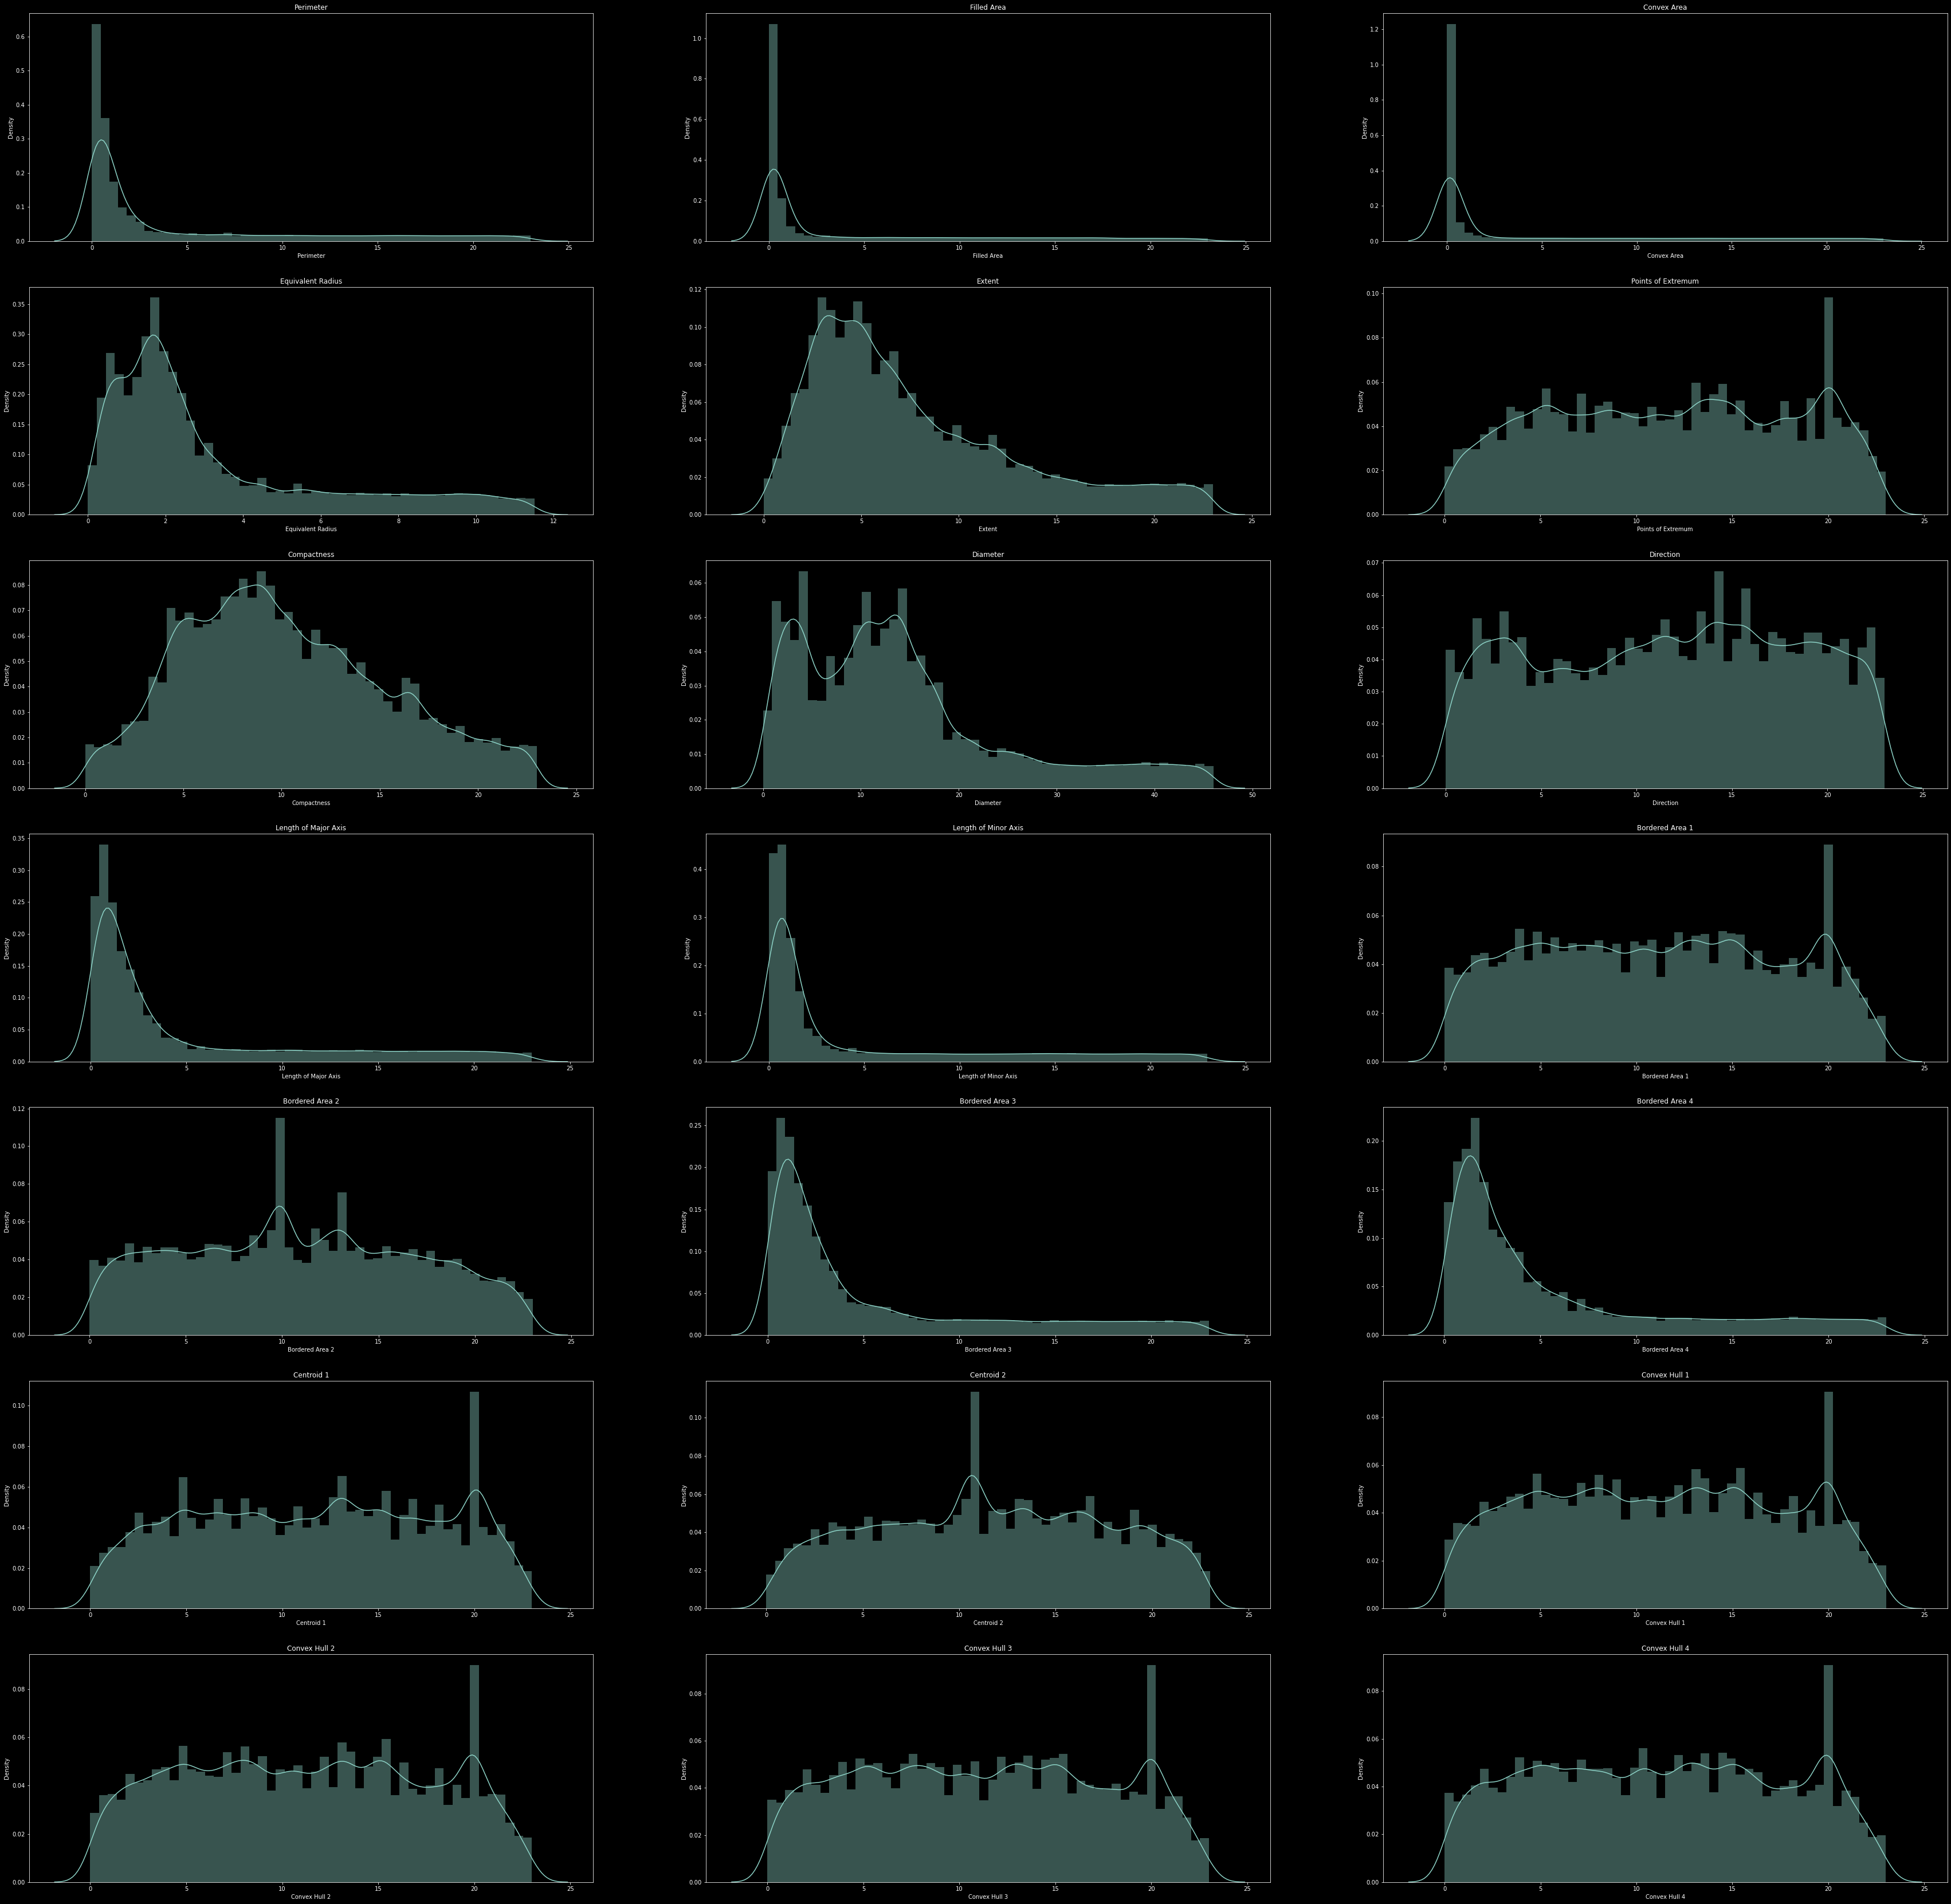

In [ ]:
# looking at kdeplots of column after applying transformation
plt.figure(figsize=(60,60)) 
for i in tqdm(range(len(df_combo.select_dtypes('float').columns))): 
  plt.subplot(7,3, i+1)
  sns.distplot(df_combo[df_combo.select_dtypes('float').columns[i]])
  plt.title(str(df_combo.select_dtypes('float').columns[i]))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_combo = scaler.fit_transform(df_combo.values)

### Modelling

In [ ]:
train = pd.DataFrame(df_combo).head(df_train.shape[0])
test = pd.DataFrame(df_combo).tail(df_test.shape[0]).reset_index().drop('index',axis=1)

In [ ]:
X = train.values
y = target

test = test.values

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2084)

## Trying Out Different Models

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score
from sklearn.metrics import classification_report

rfc = RandomForestClassifier()

# rfc.fit(x_train,y_train)

# y_test_preds_proba_rfc = rfc.predict_proba(x_test)
# y_test_preds_rfc = rfc.predict(x_test)

# print('Accuracy Score   '+str(accuracy_score(y_test, y_test_preds_rfc)))

## ETC

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)

# y_test_preds_proba_etc = etc.predict_proba(x_test)
# y_test_preds_etc = etc.predict(x_test)

# print('Accuracy Score   '+str(accuracy_score(y_test, y_test_preds_etc)))

ExtraTreesClassifier()

## XGB

In [ ]:
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score
from sklearn.metrics import classification_report

xgbc = XGBClassifier(max_depth=9)

# xgbc.fit(x_train,y_train,eval_set=[[x_train,y_train],[x_test,y_test]])

# y_test_preds_proba_xgbc = xgbc.predict_proba(x_test)
# y_test_preds_xgbc = xgbc.predict(x_test)

# print('Accuracy Score   '+str(accuracy_score(y_test, y_test_preds_xgbc)))

In [ ]:
# xgbrc = XGBRFClassifier()

# xgbrc.fit(x_train,y_train,eval_set=[[x_train,y_train],[x_test,y_test]])

# y_test_preds_proba_xgbrc = xgbrc.predict_proba(x_test)
# y_test_preds_xgbrc = xgbrc.predict(x_test)

# print('Accuracy Score   '+str(accuracy_score(y_test, y_test_preds_xgbrc)))

In [ ]:
# feat_importances = pd.Series(xgbc.feature_importances_, index=train.columns)
# feat_importances.nlargest(22).plot(kind='barh')
# plt.title("Top 22 important features")
# plt.show()

## CBC

In [ ]:
# from catboost import CatBoostClassifier

# cbc = CatBoostClassifier()

# cbc.fit(x_train,y_train,eval_set=(x_test,y_test))

# y_test_preds_proba_cbc = cbc.predict_proba(x_test)
# y_test_preds_cbc = cbc.predict(x_test)

# print('Accuracy Score   '+str(accuracy_score(y_test, y_test_preds_cbc)))

## LGBM

In [ ]:
lgb_params = {'n_estimators': 154, 'num_leaves': 18, 'min_child_samples': 3, 'learning_rate': 0.17402065726724145, 'log_max_bin': 8,
              'colsample_bytree': 0.6649148062238498, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.006761362450996487}

In [ ]:
import lightgbm as lgb
lgc = lgb.LGBMClassifier(**lgb_params)

# lgc.fit(x_train,y_train,eval_set=[[x_train,y_train],[x_test,y_test]])

# y_test_preds_proba_lgc = lgc.predict_proba(x_test)
# y_test_preds_lgc = lgc.predict(x_test)

# print('Accuracy Score   '+str(accuracy_score(y_test, y_test_preds_lgc)))

## STK

In [ ]:
from sklearn.ensemble import StackingClassifier
stk = StackingClassifier([('xgb',XGBClassifier(max_depth=9)),
                          ('etc',ExtraTreesClassifier()),
                        ('rfc',RandomForestClassifier())])
stk.fit(x_train,y_train)

y_test_preds_proba_stk = stk.predict_proba(x_test)
y_test_preds_stk = stk.predict(x_test)

print('Accuracy Score   '+str(accuracy_score(y_test, y_test_preds_stk)))

Accuracy Score   0.6413629629629629


## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier



## SUBMISSION FILE

### Making the Final Submission File

In [ ]:
preds_test = stk.predict(test)
preds_test = preds_test.astype('int64')
preds_test

array([3, 8, 1, ..., 2, 8, 8])

In [ ]:
df_sub['Bacteria'] = preds_test
df_sub['Bacteria'].value_counts()

1    2596
0    2576
6    2486
8    2479
4    2475
2    2451
5    2424
3    2397
7    2380
Name: Bacteria, dtype: int64

In [ ]:
df_sub['Bacteria'] = le.inverse_transform(df_sub['Bacteria'])
df_sub.to_csv('ashisparida_question1.csv',index=False)
df_sub

,ID,Bacteria
0,0,Flitter
1,1,Raizovox
2,2,Cruor
3,3,Potentiopus
4,4,Onyxium
...,...,...
22259,22259,Cruor
22260,22260,Cruor
22261,22261,Elixoria
22262,22262,Raizovox
